<a href="https://colab.research.google.com/github/Lasata-T/Group1Project2/blob/main/Copy_of_Project2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [48]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import date, timedelta
import matplotlib.dates as mdates
from google.colab import files
import io
from statsmodels.tsa.arima.model import ARIMA
from pandas import DataFrame
from pandas.plotting import autocorrelation_plot

In [ ]:
# data source 1: https://covid.cdc.gov/covid-data-tracker/#trends_weeklyhospitaladmissions_select_00

In [ ]:
# data source 2: https://covid.cdc.gov/covid-data-tracker/#trends_weeklydeaths_select_00

In [2]:
uploaded = files.upload()

Saving weekly_hospital.csv to weekly_hospital.csv


In [3]:
df = pd.read_csv('weekly_hospital.csv')
print(df)

         Geography         Date  Weekly COVID-19 Hospital Admissions
0    United States  Feb 17 2024                              18977.0
1    United States  Feb 10 2024                              20129.0
2    United States  Feb  3 2024                              21212.0
3    United States  Jan 27 2024                              23297.0
4    United States  Jan 20 2024                              25979.0
..             ...          ...                                  ...
210  United States  Feb  8 2020                                  NaN
211  United States  Feb  1 2020                                  NaN
212  United States  Jan 25 2020                                  NaN
213  United States  Jan 18 2020                                  NaN
214  United States  Jan 11 2020                                  NaN

[215 rows x 3 columns]


In [4]:
df_new = df.dropna()
df_new

,Geography,Date,Weekly COVID-19 Hospital Admissions
0,United States,Feb 17 2024,18977.0
1,United States,Feb 10 2024,20129.0
2,United States,Feb 3 2024,21212.0
3,United States,Jan 27 2024,23297.0
4,United States,Jan 20 2024,25979.0
...,...,...,...
180,United States,Sep 5 2020,26462.0
181,United States,Aug 29 2020,28194.0
182,United States,Aug 22 2020,29424.0
183,United States,Aug 15 2020,29869.0


In [5]:
geo = df_new['Geography']
date = df_new['Date']
admin = df_new['Weekly COVID-19 Hospital Admissions']

In [19]:
type(admin)

pandas.core.series.Series

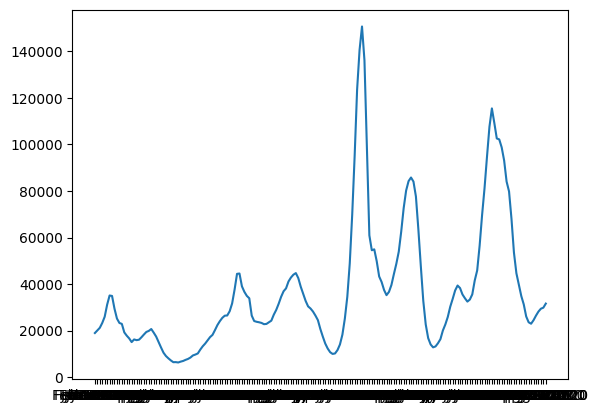

In [6]:
plt.plot(date, admin)

In [8]:
uploaded2 = files.upload()

Saving weekly_deaths.csv to weekly_deaths.csv


In [10]:
df2 = pd.read_csv('weekly_deaths.csv')
print(df2)

         Geography         Date  Weekly Deaths Death Data As Of
0    United States  Feb 17 2024            526      Feb 22 2024
1    United States  Feb 10 2024           1129      Feb 22 2024
2    United States  Feb  3 2024           1398      Feb 22 2024
3    United States  Jan 27 2024           1883      Feb 22 2024
4    United States  Jan 20 2024           2210      Feb 22 2024
..             ...          ...            ...              ...
210  United States  Feb  8 2020              4      Feb 22 2024
211  United States  Feb  1 2020              0      Feb 22 2024
212  United States  Jan 25 2020              3      Feb 22 2024
213  United States  Jan 18 2020              2      Feb 22 2024
214  United States  Jan 11 2020              1      Feb 22 2024

[215 rows x 4 columns]


In [14]:
df2_new = df2.fillna(0)
df2_new

,Geography,Date,Weekly Deaths,Death Data As Of
0,United States,Feb 17 2024,526,Feb 22 2024
1,United States,Feb 10 2024,1129,Feb 22 2024
2,United States,Feb 3 2024,1398,Feb 22 2024
3,United States,Jan 27 2024,1883,Feb 22 2024
4,United States,Jan 20 2024,2210,Feb 22 2024
...,...,...,...,...
210,United States,Feb 8 2020,4,Feb 22 2024
211,United States,Feb 1 2020,0,Feb 22 2024
212,United States,Jan 25 2020,3,Feb 22 2024
213,United States,Jan 18 2020,2,Feb 22 2024


In [15]:
geo2 = df2_new['Geography']
date2 = df2_new['Date']
death = df2_new['Weekly Deaths']
death_date = df2_new['Death Data As Of']

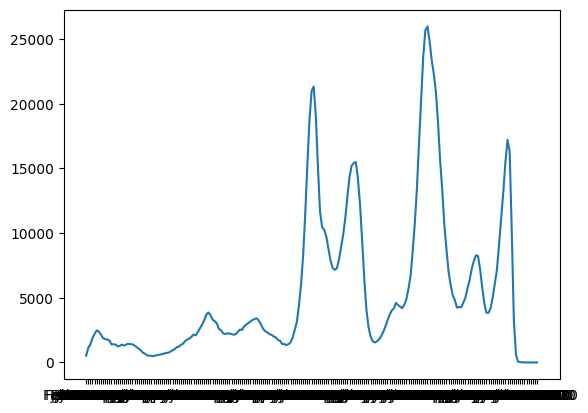

In [16]:
plt.plot(date2, death)

In [21]:
df_new['Date'] = pd.to_datetime(df_new['Date'], format='%b %d %Y')
df2_new['Date'] = pd.to_datetime(df2_new['Date'], format='%b %d %Y')

df_merged = pd.merge(df_new, df2_new, on=['Date', 'Geography'], how='inner', suffixes=('_admissions', '_deaths'))


df_merged.head()

<ipython-input-21-9735f40c3151>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new['Date'] = pd.to_datetime(df_new['Date'], format='%b %d %Y')


,Geography,Date,Weekly COVID-19 Hospital Admissions,Weekly Deaths,Death Data As Of
0,United States,2024-02-17,18977.0,526,Feb 22 2024
1,United States,2024-02-10,20129.0,1129,Feb 22 2024
2,United States,2024-02-03,21212.0,1398,Feb 22 2024
3,United States,2024-01-27,23297.0,1883,Feb 22 2024
4,United States,2024-01-20,25979.0,2210,Feb 22 2024


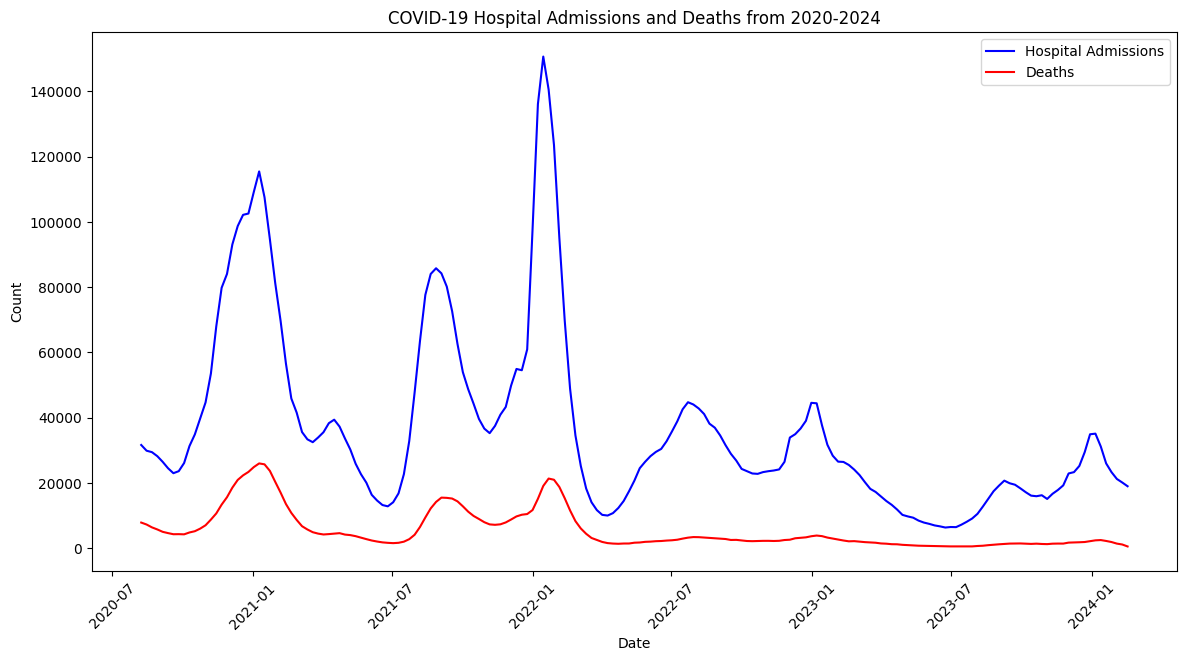

In [27]:
plt.figure(figsize=(14, 7))

# Plotting Weekly COVID-19 Hospital Admissions
plt.plot(df_merged['Date'], df_merged['Weekly COVID-19 Hospital Admissions'], label='Hospital Admissions', color='blue')
plt.xlabel('Date')
plt.xticks(rotation=45)

# Plotting Weekly COVID-19 Deaths
plt.plot(df_merged['Date'], df_merged['Weekly Deaths'], label='Deaths', color='red')
plt.xlabel('Date')
plt.xticks(rotation=45)
plt.ylabel('Count')

plt.title('COVID-19 Hospital Admissions and Deaths from 2020-2024')
plt.legend()
plt.show()

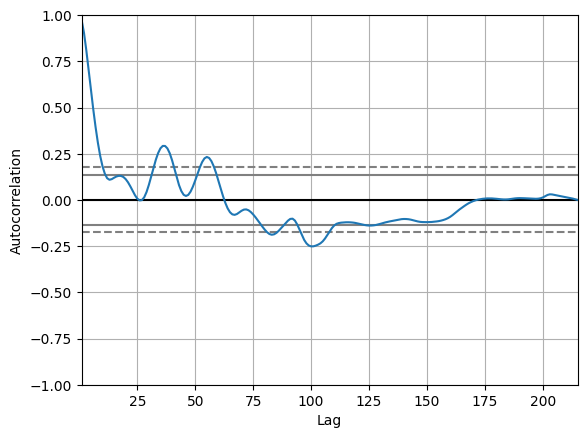

In [50]:
# 'AR' p art of ARIMA
autocorrelation_plot(df2_new['Weekly Deaths'])
plt.show()
# between 0 - 63 --> positive correlation --> most drastic from 0 - approx. 13

In [76]:
# second part of research question
model = ARIMA(death, order=(13,1,1))
model_fit = model.fit()

In [77]:
# summary of fit model
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:          Weekly Deaths   No. Observations:                  215
Model:                ARIMA(13, 1, 1)   Log Likelihood               -1637.869
Date:                Tue, 12 Mar 2024   AIC                           3305.739
Time:                        17:41:02   BIC                           3356.228
Sample:                             0   HQIC                          3326.141
                                - 215                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9031      0.566      1.595      0.111      -0.206       2.013
ar.L2         -0.0597      0.843     -0.071      0.944      -1.711       1.592
ar.L3         -0.3697      0.527     -0.702      0.4

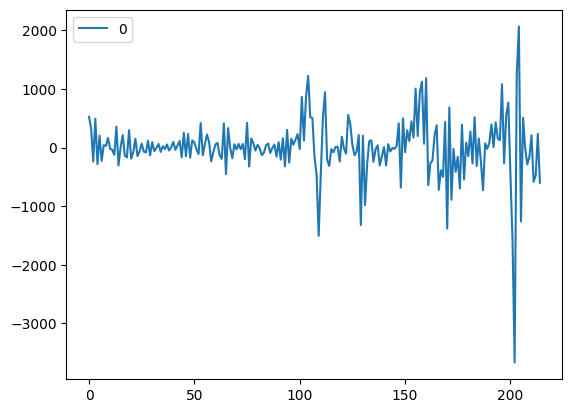

In [78]:
# line plot of residuals
residuals = DataFrame(model_fit.resid)
residuals.plot()
plt.show()

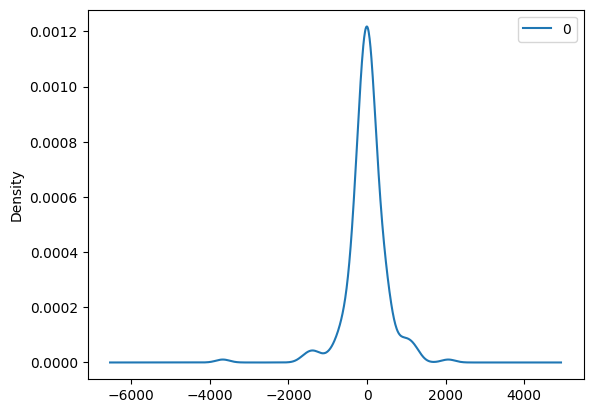

In [79]:
# density plot of residuals
residuals.plot(kind='kde')
plt.show()
# errors are Gaussian, centered on zero

In [80]:
# summary stats of residuals
print(residuals.describe())

                 0
count   215.000000
mean      1.442268
std     509.351297
min   -3669.336269
25%    -163.590466
50%       7.426544
75%     177.880537
max    2066.972529


In [83]:
# rolling forecasting

# split into train and test sets
X = death.values
size = int(len(X) * 0.66)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = list()

In [84]:
# walk-forward validation
for t in range(len(test)):
 model = ARIMA(history, order=(5,1,0))
 model_fit = model.fit()
 output = model_fit.forecast()
 yhat = output[0]
 predictions.append(yhat)
 obs = test[t]
 history.append(obs)
 print('predicted=%f, expected=%f' % (yhat, obs))

predicted=2348.527500, expected=2347.000000
predicted=2657.322343, expected=2770.000000
predicted=3182.829483, expected=3238.000000
predicted=3651.730029, expected=3678.000000
predicted=3995.001501, expected=4006.000000
predicted=4191.171095, expected=4165.000000
predicted=4173.967485, expected=4601.000000
predicted=5189.907747, expected=4450.000000
predicted=3862.034959, expected=4313.000000
predicted=4150.957105, expected=4197.000000
predicted=4262.121748, expected=4461.000000
predicted=4846.077952, expected=4893.000000
predicted=5355.587085, expected=5725.000000
predicted=6623.652939, expected=6731.000000
predicted=7696.716775, expected=8654.000000
predicted=10840.085207, expected=10807.000000
predicted=12746.517847, expected=13519.000000
predicted=15961.259236, expected=17034.000000
predicted=20685.836920, expected=20322.000000
predicted=22794.539144, expected=23687.000000
predicted=26532.374185, expected=25692.000000
predicted=26553.307511, expected=25974.000000
predicted=24821.81

In [91]:
# evaluate forecasts
from math import sqrt
from sklearn.metrics import mean_squared_error

rmse = sqrt(mean_squared_error(test, predictions))
print('Test RMSE: %.3f' % rmse)

Test RMSE: 881.948


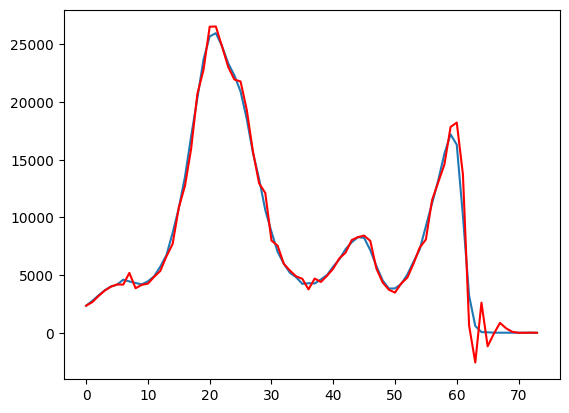

In [93]:
# plot forecasts against actual outcomes
plt.plot(test)
plt.plot(predictions, color='red')
plt.show()

In [ ]:
# ARIMA: https://machinelearningmastery.com/arima-for-time-series-forecasting-with-python/

In [ ]:
# ARIMA2: https://www.capitalone.com/tech/machine-learning/arima-model-time-series-forecasting/